# Importamos las utilidades de `utils.py`


In [2]:
from utils import *
import networkx as nx
import matplotlib.pyplot as plt

# Obtenemos la info de los exchanges y cryptos


In [3]:
cryptocurrencys = read_json("data/json/coinmarket/cryptos_coinmarket_2024-04-16.json")

# Ahora creamos las relaciones que hay entre exchange y crypto


In [4]:
color_exchange = generate_rgb() # genera color aleatorio para el exchange
color_crypto = generate_rgb() # genera color aleatorio para la crypto
colors = [] # lista de colores

In [5]:
exchanges_crypto_edges: list[tuple] = [] # lista de tuplas (crypto, exchange)
crypto_names = set() # conjunto de nombres de cryptos

# se obtienen los nombres de las cryptos y se crean las aristas entre las cryptos y los exchanges
for category in cryptocurrencys:
    # se obtienen las cryptos de la categoria
    cryptos: list[dict] = cryptocurrencys[category]["coins"]
    # se recorren las cryptos
    for crypto in cryptos:
        # se añade el nombre de la crypto al conjunto
        crypto_names.add(crypto["symbol"])
        # se recorren los exchanges de la crypto
        for exchange in crypto["exchanges"]["data"]:
            # se añade la arista entre la crypto y el exchange
            exchanges_crypto_edges.append((crypto["symbol"], exchange["name"]))

In [6]:
len(exchanges_crypto_edges)

13669

In [7]:
len(crypto_names)

1031

# Graficamos el grafo


In [8]:
G = nx.Graph() # se crea el grafo

In [9]:
G.add_edges_from(exchanges_crypto_edges) # se añaden las aristas al grafo

In [10]:
nodes_name = list(G.nodes.keys())  # se obtienen los nombres de todos los nodos

# se obtienen los colores de los nodos en base a si son cryptos o exchanges
colors: list[str] = list(map(lambda crypto: color_crypto if (crypto in crypto_names) else color_exchange, nodes_name))

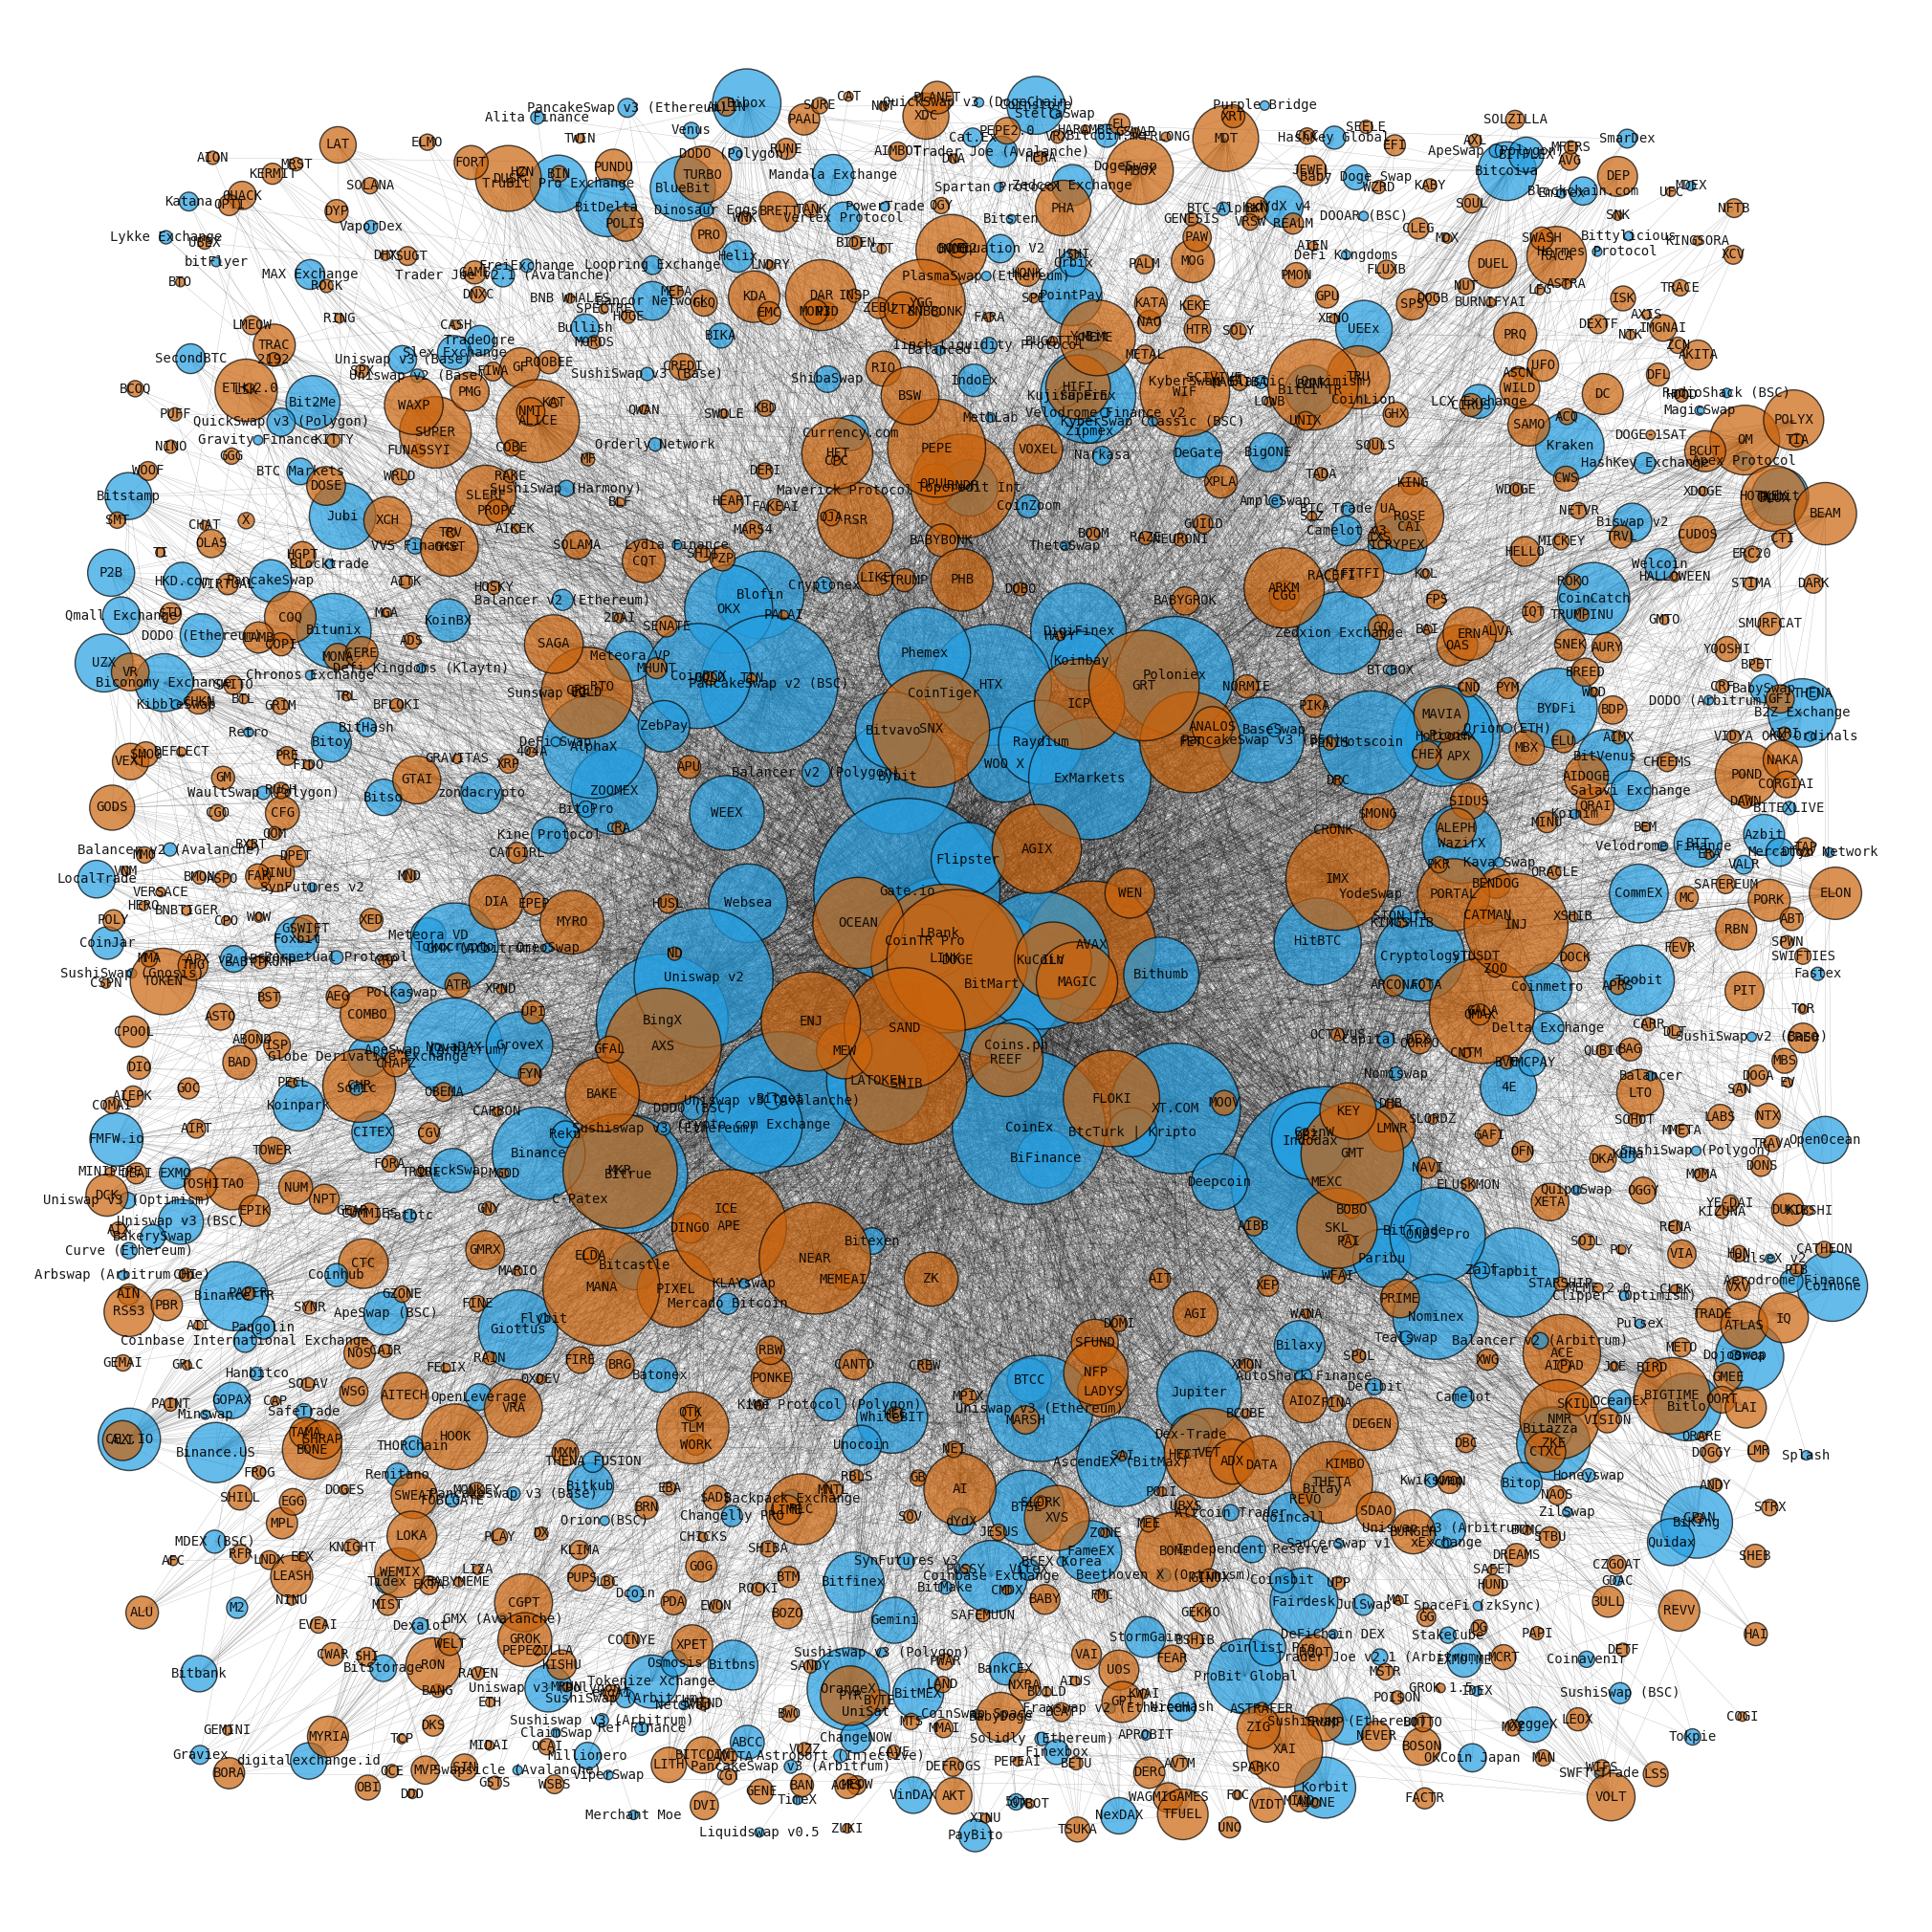

In [21]:
from pylab import rcParams
import numpy as np

# Se setea el tamaño de la figura
rcParams["figure.figsize"] = 20, 20

# Se obtienen las posiciones de los nodos
pos_xy = nx.spring_layout(G, scale=20, k=10 / np.sqrt(G.order()), iterations=3)

# Obtener el grado de los nodos
degrees = dict(G.degree) # type: ignore

# Se obtienen los tamaños de los nodos
node_sizes = [d[node] * 50 for node in degrees]  # type: ignore

# Se dibuja el grafo
fig = plt.figure(frameon=False)
ax = fig.add_axes((0, 0, 1, 1))
ax.axis("off")


# Se dibujan los nodos
nx.draw_networkx_nodes(
    G,
    pos_xy,
    node_color=colors,  # type: ignore
    node_size=node_sizes,  # type: ignore
    alpha=0.7,
    edgecolors="black",
    margins=0,
)

# Se dibujan las etiquetas
nx.draw_networkx_labels(
    G,
    pos_xy,
    font_size=10,
    font_color="black",
    clip_on=False,
    alpha=0.9,
    font_family="monospace",
)

# Se dibujan las aristas
nx.draw_networkx_edges(
    G,
    pos_xy,
    width=0.15,
    style="-",
    edge_color="k",
    alpha=0.5,
)